In [1]:
import pbjam as pb
import lightkurve as lk 
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(f'PBjam version {pb.__version__}')
print(f'Lightkurve version {lk.__version__}')

PBjam version 0.1.9
Lightkurve version 1.5.dev


In [3]:
ID = 'TIC349374677'
numax = []
dnu = []
teff = [4947, 80]
bp_rp = [1.34, 0.2]

In [4]:
lcs = lk.search_lightcurvefile(ID, mission='TESS').download_all()

In [5]:
lc = lcs.PDCSAP_FLUX.stitch().flatten(window_length=1001).normalize('ppm').remove_outliers(5)

/Users/davies/Software/lightkurve/lightkurve/lightcurve.py:667: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


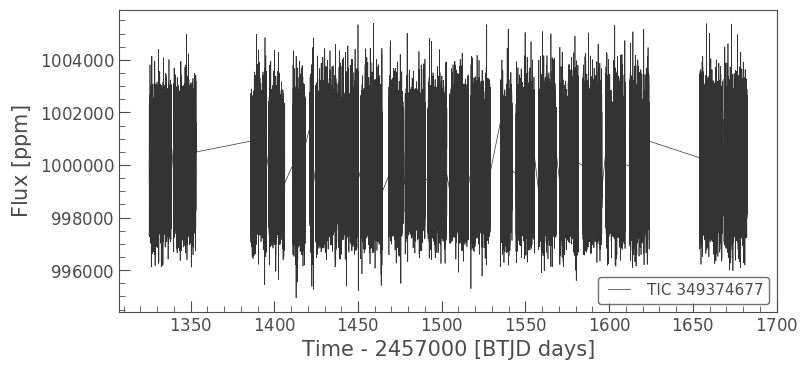

In [6]:
lc.plot()

In [7]:
pg = lc.to_periodogram(normalization='psd', maximum_frequency=350.0).flatten()

In [8]:
seismology = pg.to_seismology()
seismology.estimate_numax()
seismology.estimate_deltanu()

deltanu: 15.04 uHz (method: ACF2D)

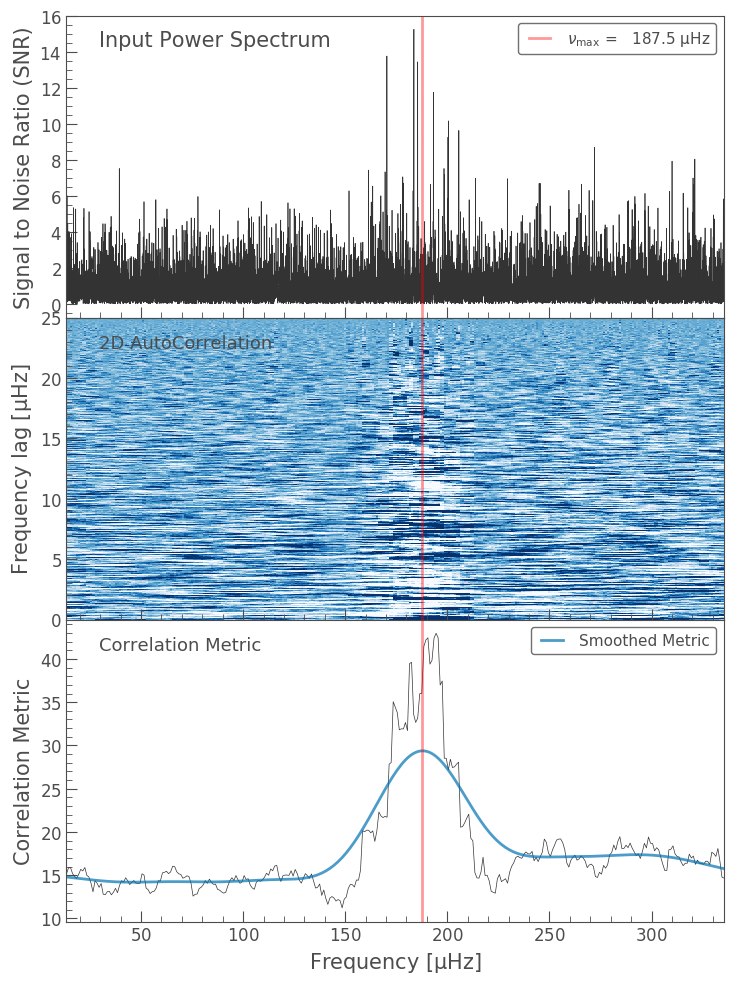

In [9]:
seismology.diagnose_numax();

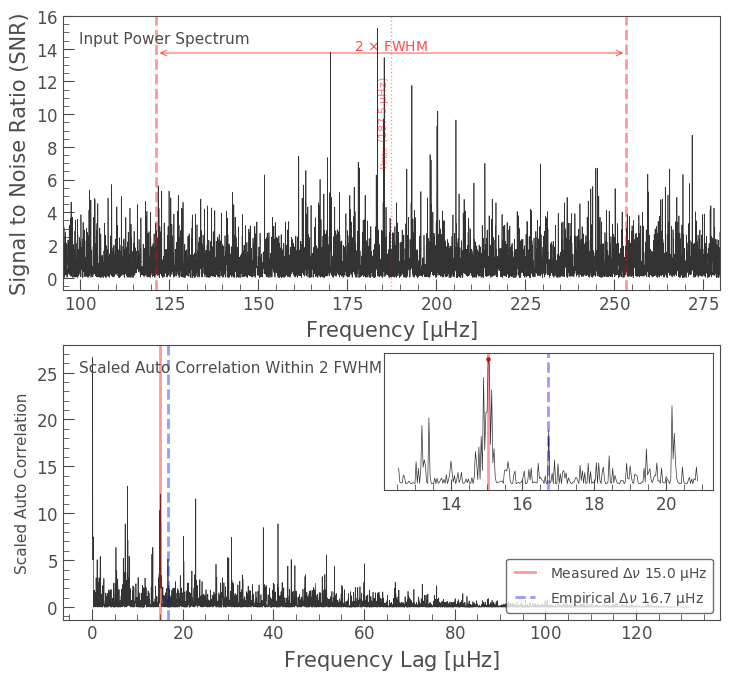

In [10]:
seismology.diagnose_deltanu();

In [11]:
numax = [seismology.numax.value, 5.0]
dnu = [seismology.deltanu.value, 0.2]

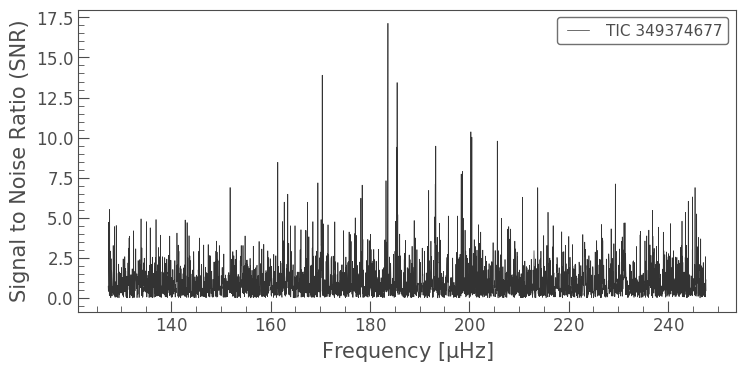

In [12]:
pg = lc.to_periodogram(normalization='psd',
                      minimum_frequency=numax[0] - dnu[0] * 4,
                      maximum_frequency=numax[0] + dnu[0] * 4).flatten()
pg.plot()

In [14]:
star = pb.star(ID, pg, 
               numax, dnu, teff, bp_rp)

Starting KDE estimation


/Users/davies/Code/PBjam/pbjam/priors.py:66: UserWarning: There are only 149 stars in the prior. I will expand the prior untill I have 100 stars.
  'I will expand the prior untill I have 100 stars.')


Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Steps taken: 6000
Steps taken: 7000
Steps taken: 8000
Steps taken: 9000
Steps taken: 10000
Steps taken: 11000
Steps taken: 12000
Steps taken: 13000
Steps taken: 14000
Steps taken: 15000
Steps taken: 16000
Steps taken: 17000
Steps taken: 18000
Steps taken: 19000
Steps taken: 20000
Sampler stopped at 20000 (maximum). Chains did not necessarily reach a stationary state.
Starting Asy_peakbag
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting peakbagging run


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The acceptance probability does not match the target. It is 0.8400476036068948, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 8min 42s, sys: 4.38 s, total: 8min 47s
Wall time: 8min 54s


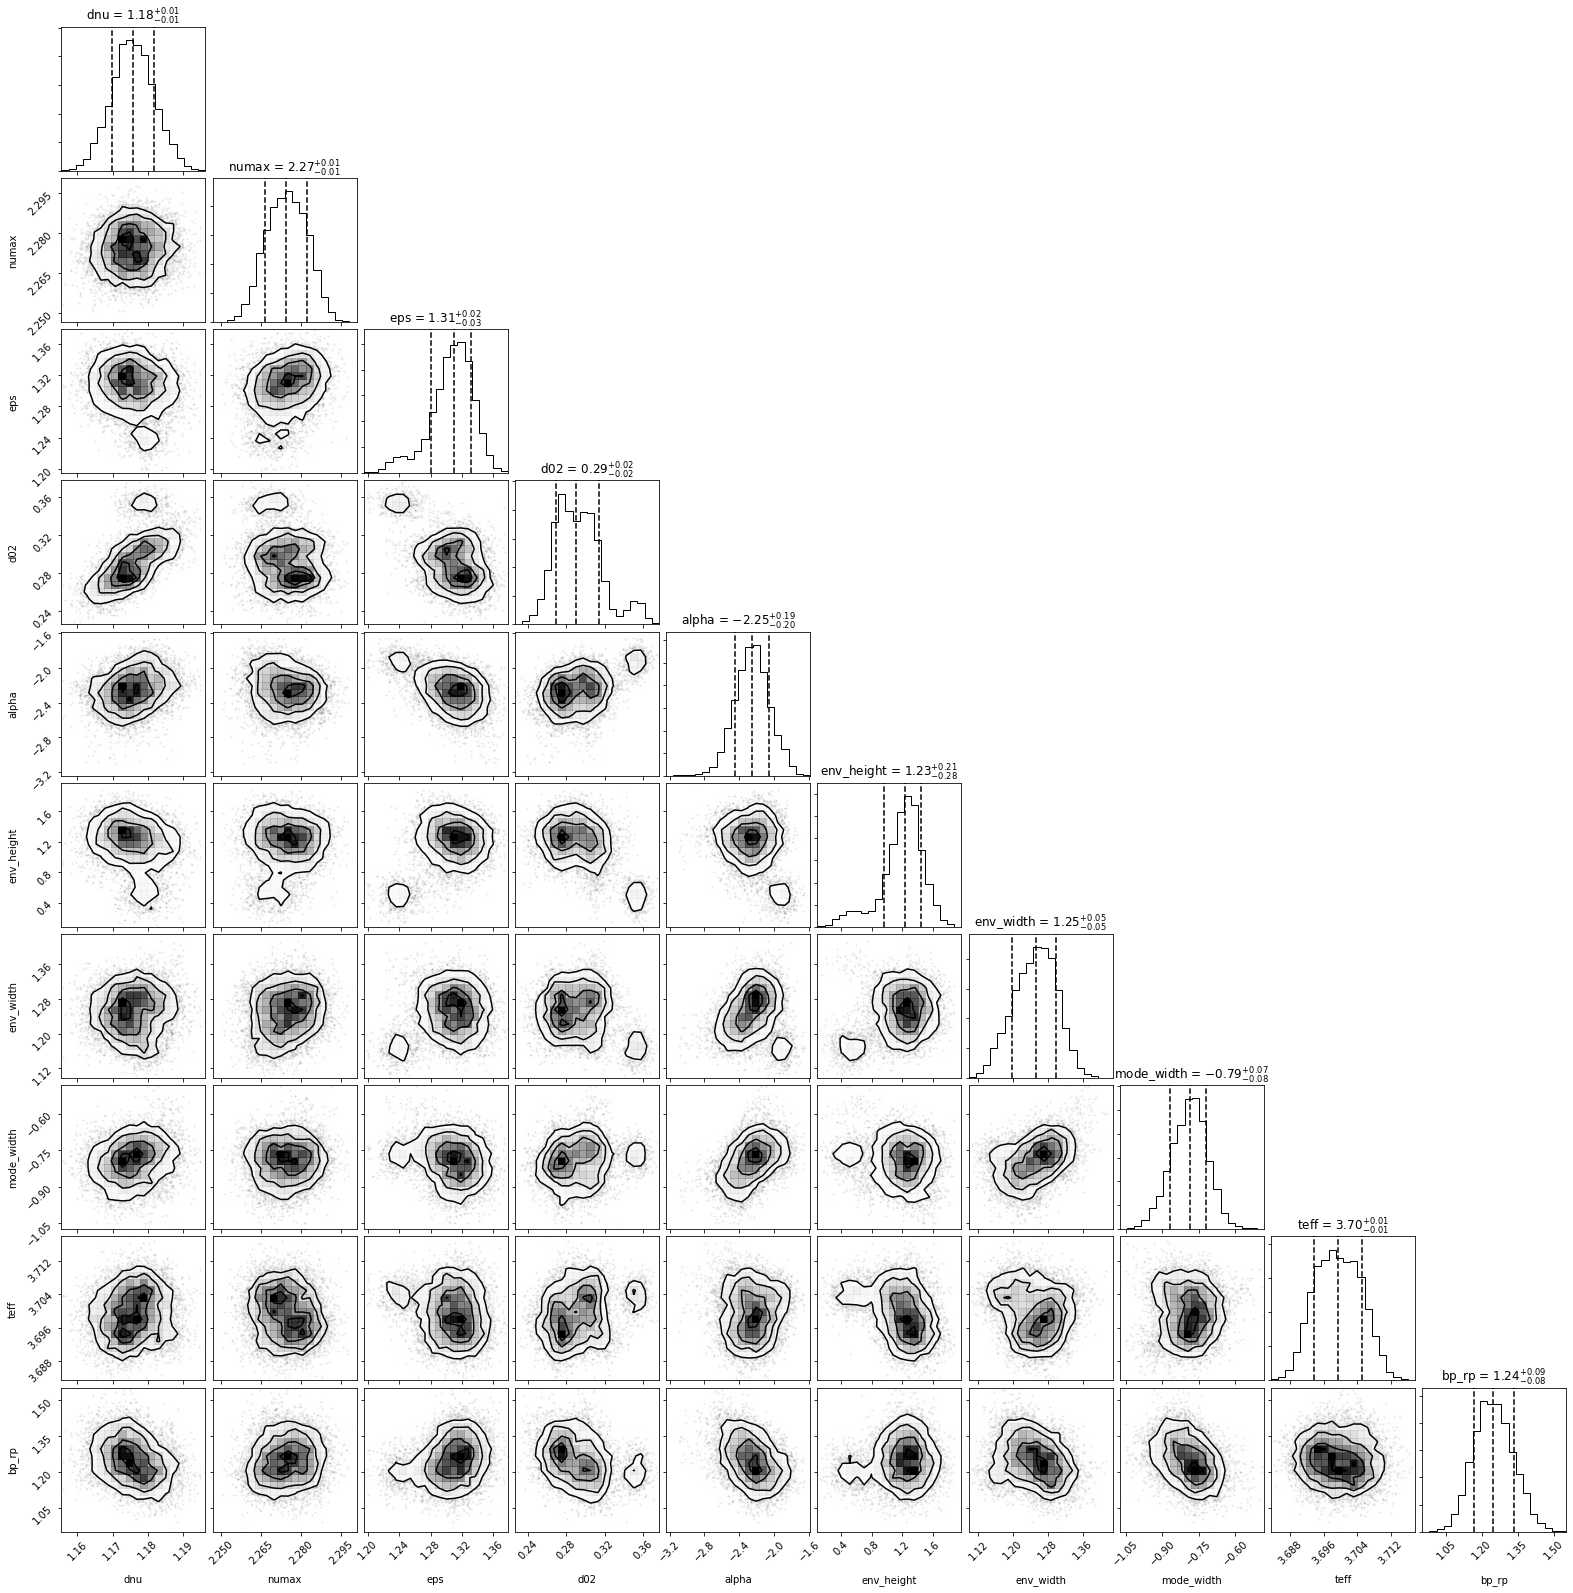

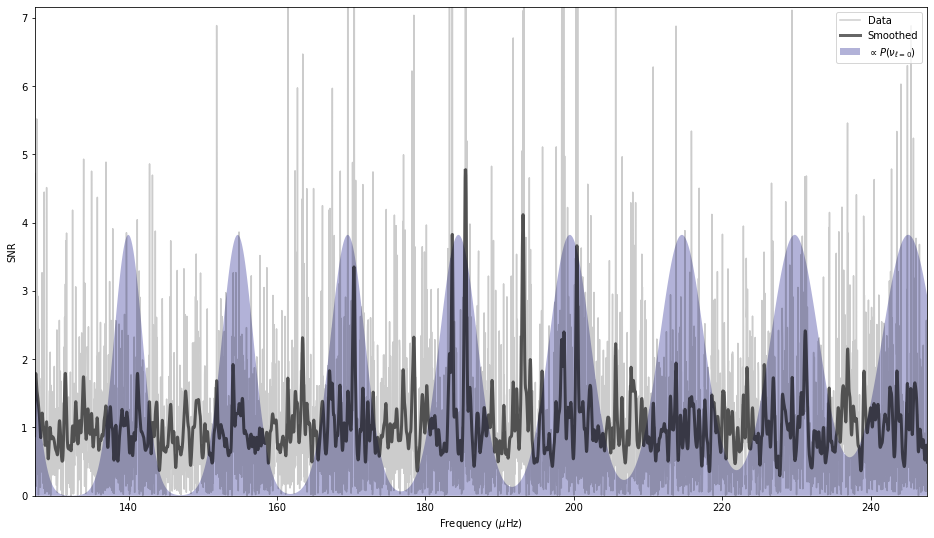

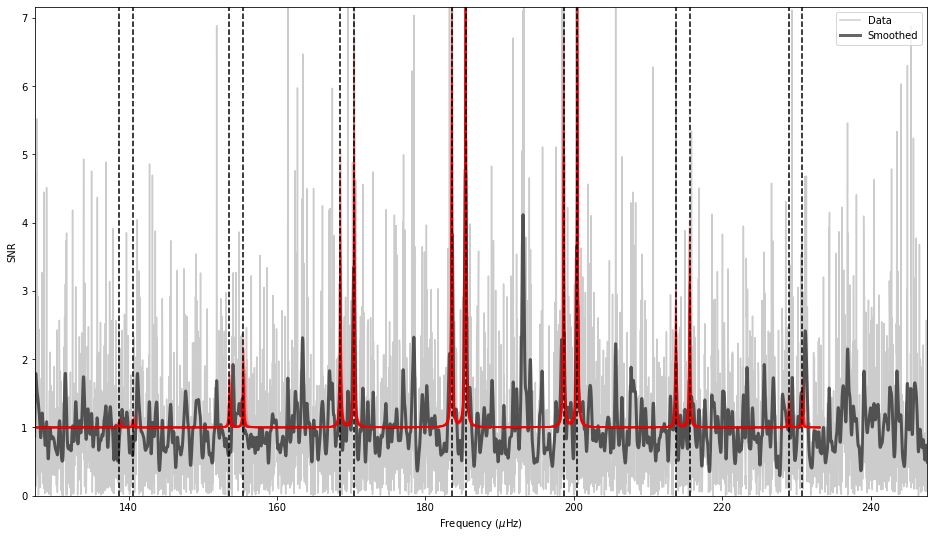

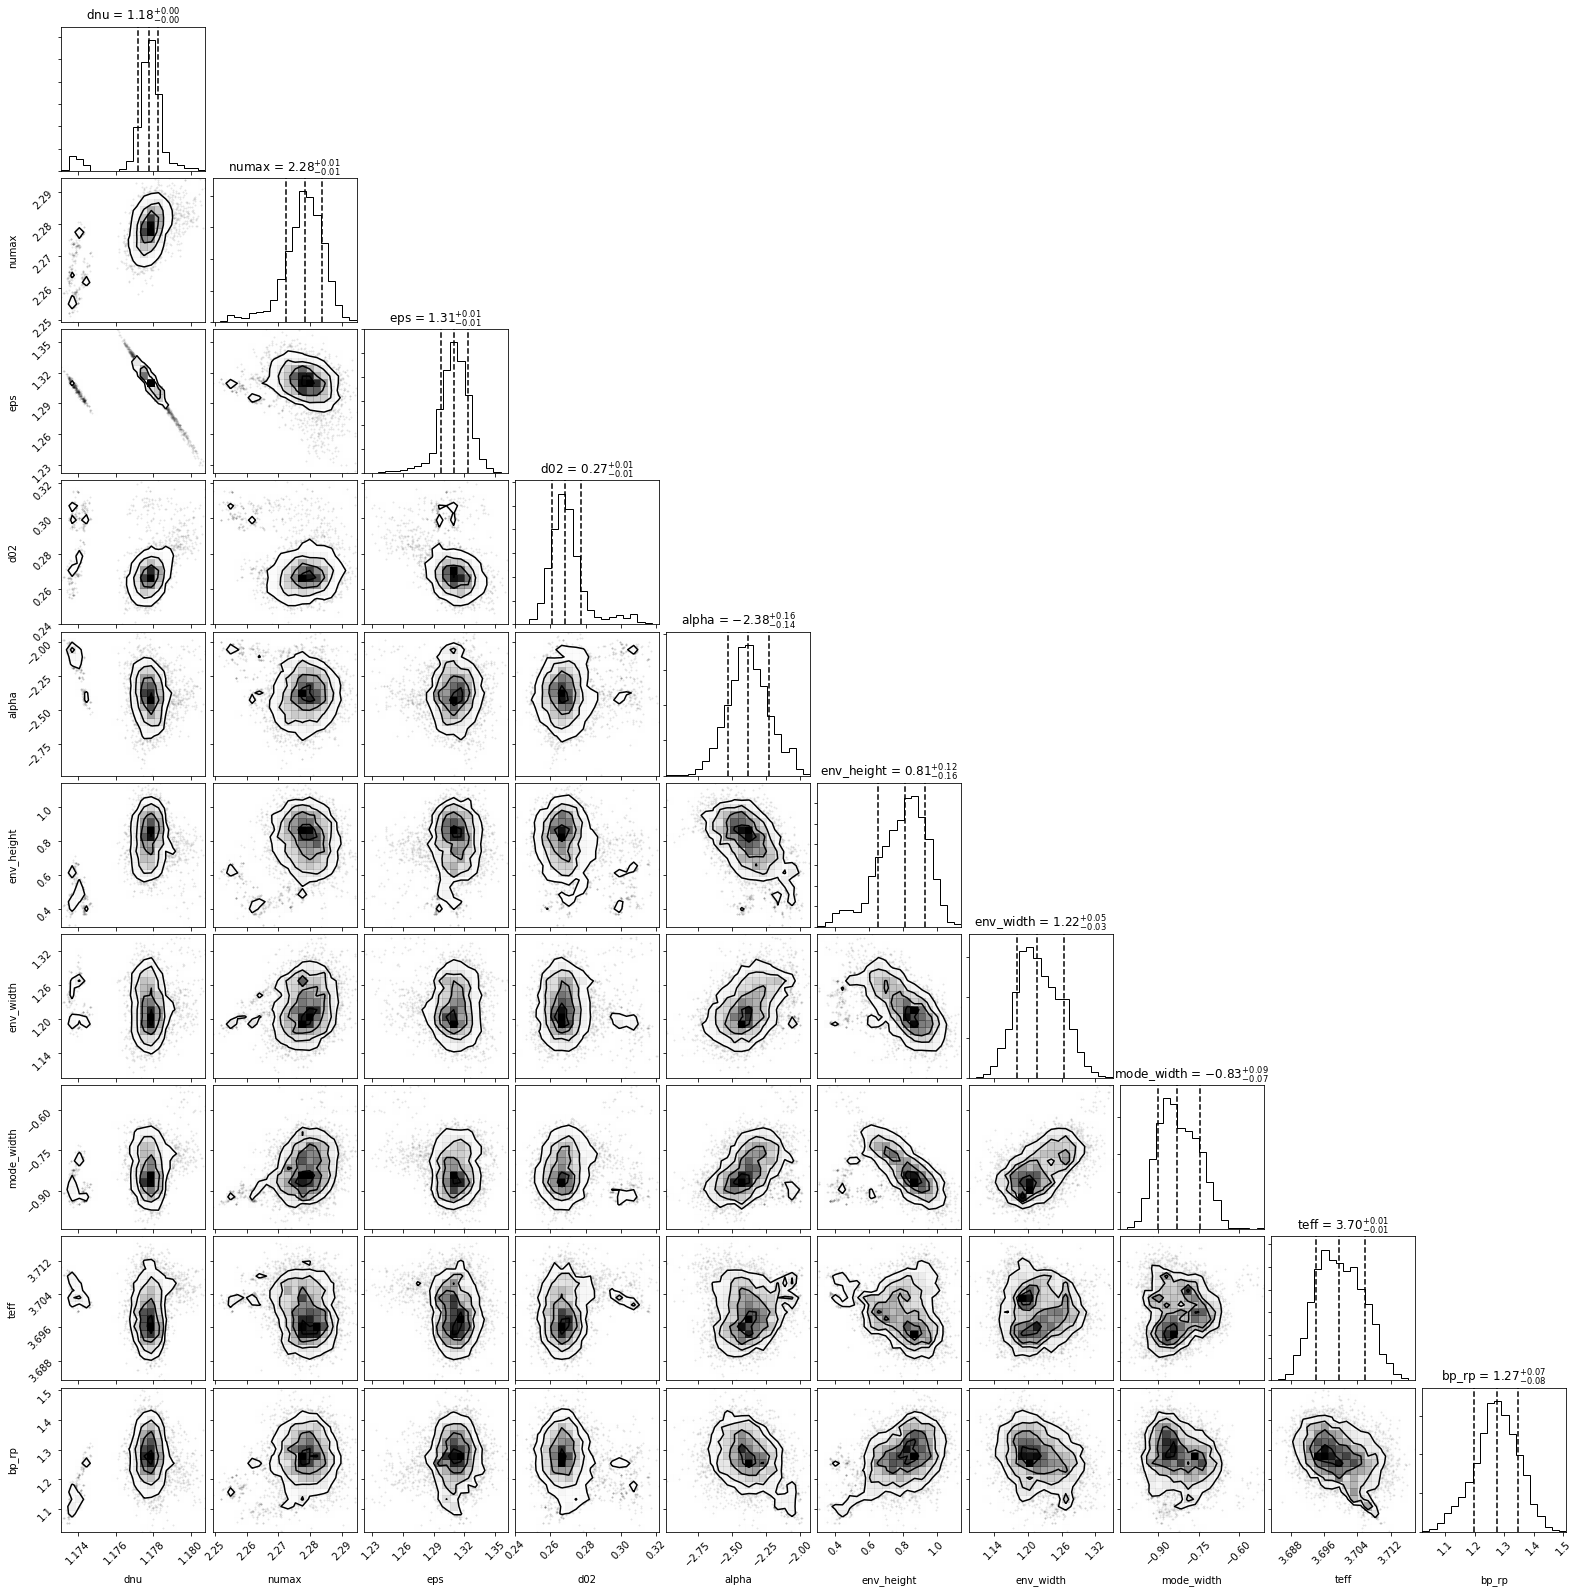

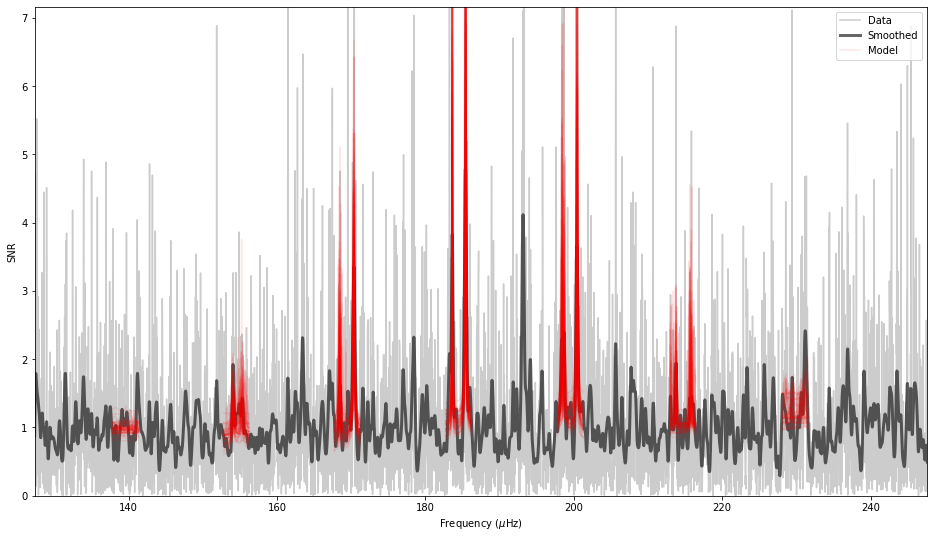

In [15]:
%%time
star(norders=7)

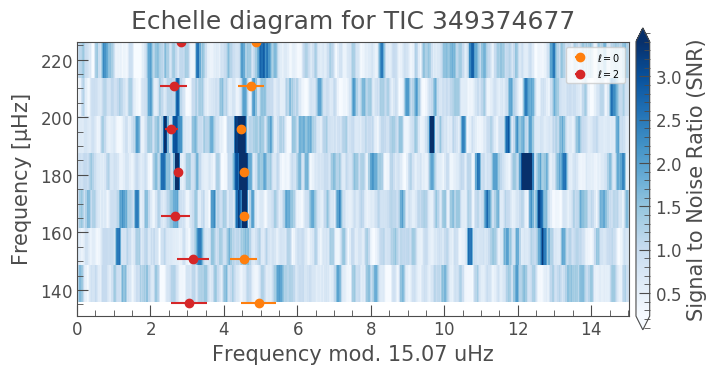

In [16]:
star.peakbag.plot_echelle()